In [1]:
import pandas as pd
import random
from statistics import NormalDist
import numpy as np
from prices_function import get_historic_data

In [3]:
df_prices = get_historic_data('BTC','USD','minute')[['open','low','high','close']]
df_prices['ret%'] = df_prices['close'].pct_change().dropna()

baseurl:  https://min-api.cryptocompare.com/data/v2/histominute
timeframe:  minute
parameters:  {'fsym': 'BTC', 'tsym': 'USD', 'limit': 2000, 'aggregate': 1}


Calculate Statistics

In [4]:
statistic = {
    'mean':df_prices['ret%'].mean(),
    'std':df_prices['ret%'].std(),
    'kurtosis':df_prices['ret%'].kurtosis(),
    'skewness':df_prices['ret%'].skew(),
    'last':df_prices['close'].tail(1).values[0],
    }

In [13]:
def simulation(n_step, n_simulation=1000, statistic={'mean':0, 'std':1}):

    df_randon_numbers = pd.DataFrame(np.zeros((n_step, n_simulation)))
    distribution = NormalDist(mu=statistic['mean'], sigma=statistic['std'])
    df_randon_numbers.applymap(lambda x: x + distribution.inv_cdf(random.random()))


{'mean': -5.195657870336823e-06,
 'standard_deviation': 0.000483600884749465,
 'kurtosis': 3.617080968954552,
 'skewness': -0.21005845652906652}

In [14]:
d = pd.DataFrame(np.zeros((10, 100)))
distribution = NormalDist(mu=0, sigma=1)
d = d.applymap(lambda x: x + distribution.inv_cdf(random.random()))
d

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,1.269089,-0.702701,1.251374,0.001250,0.475068,0.018206,-0.077841,0.851982,0.189020,-1.129358,...,1.451580,0.007160,0.579528,-0.647433,0.457381,-0.987102,0.102626,0.282677,1.070273,1.271813
1,-0.130257,-1.704904,0.303787,-0.819775,-0.458485,-0.430383,0.416503,-0.135237,-2.035595,0.068792,...,-0.604301,1.618861,-1.159741,0.354021,-0.126593,0.181777,0.584502,0.671945,-0.487855,-0.077517
2,-0.346850,-0.216341,0.995136,-0.432179,-0.448937,-0.055006,-0.849159,-0.659148,-0.227036,0.474427,...,1.215010,0.376114,-1.490033,-0.966194,0.512580,-0.803813,0.367418,0.162288,0.523526,1.516733
3,-1.338678,-0.921071,0.534866,0.078031,-1.333470,1.135548,-1.288300,0.696357,-0.257061,0.104605,...,2.428415,-1.291417,0.112981,-0.502476,-1.344236,0.050076,1.101859,0.286011,-0.036640,0.005444
4,1.449307,0.799991,0.636990,-0.536147,-0.051054,0.680308,0.114118,-0.626671,1.950348,-0.295682,...,1.811198,-0.253580,-1.201111,0.058609,0.803668,-0.023596,0.267196,0.456545,-1.054402,-0.441740
5,0.594971,-0.593227,-1.090425,0.966620,0.221087,1.228162,-1.316964,0.631093,0.371698,-0.633294,...,0.220980,0.004525,-1.214226,-1.395710,1.042925,0.331175,0.370189,-1.464855,-0.243724,-0.718587
6,-0.858867,0.589178,0.951778,1.204658,-1.839298,-1.184022,1.008068,1.568452,0.689715,0.572175,...,0.619432,0.613033,-0.479305,0.082272,-2.232609,0.368108,-0.637197,1.450299,-0.205489,-0.141890
7,0.221035,0.661660,-0.060833,-0.379121,-1.897558,0.667361,-1.807794,-0.263070,-0.311853,-0.011682,...,-0.772879,0.831879,0.050824,1.543799,0.887912,-1.849553,-1.040873,1.718970,3.247304,-0.261508
8,-0.976551,1.217130,-0.838609,0.099025,0.075339,-1.109952,0.299355,0.660673,-0.142579,0.614736,...,-1.324750,0.573078,-0.057136,-0.597385,1.526844,1.001933,0.120632,-0.484168,-0.469463,-0.593383
9,0.556694,0.334224,-1.361799,-0.293894,0.791881,-0.083802,-1.228319,0.409099,0.332399,0.119075,...,1.414301,-1.327478,-0.288395,0.342147,0.094752,1.105283,0.413369,-0.252781,1.396449,-0.642073


p + p(mu + std*z)

In [43]:
mu = statistic['mean']
std = statistic['std']
simulation_list = []
for column in d.columns:
    p = 19000
    step_list = []
    for z in d[column].items():
        p = p + p * (mu + std * z[1])
        step_list.append(p)
    # print(p)
    simulation_list.append(step_list)


In [49]:
df_result = pd.DataFrame(simulation_list).T

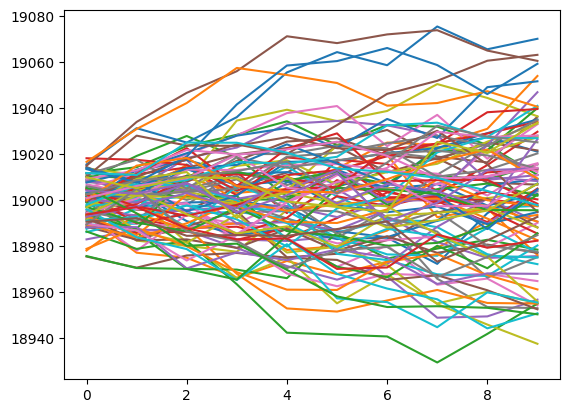

In [53]:
import matplotlib.pyplot as plt
for i in range(len((df_result.columns))):
    plt.plot(df_result[i])

In [54]:
plt.show()